Cleaning of the data- Identifying similar reasons

Load and Preprocess the Data

In [2]:
import pandas as pd
import numpy as np
import pandas as pd

# Read the Excel file (adjust the file path and sheet name as necessary)
df = pd.read_csv('reason.csv')

# Display the unique values
# distinct_values=distinct_values
df['primary_call_reason'] = df['primary_call_reason'].str.strip()
# standardize the dataset
df['primary_call_reason'] = df['primary_call_reason'].replace({
    'Voluntary   Change': 'Voluntary Change',
    'Voluntary  Change': 'Voluntary Change',
    'Check-In': 'Check In',
    'Check-In': 'Check In',
    'Other  Topics': 'Other Topics',
    'Traveler   Updates': 'Traveler Updates',
    'Traveler  Updates': 'Traveler Updates',
    'Mileage   Plus':'Mileage Plus',
    'Mileage  Plus':'Mileage Plus',
    'Digital  Support': 'Digital Support',
    'Digital   Support': 'Digital Support',
    'Voluntary  Cancel':'Voluntary Cancel',
    'Products & Services':'Products and Services',

    # Add other similar corrections if needed
})
print(df['primary_call_reason'].unique())


['Voluntary Cancel' 'Booking' 'IRROPS' 'Upgrade' 'Seating' 'Mileage Plus'
 'Checkout' 'Voluntary Change' 'Post Flight' 'Check In' 'Other Topics'
 'Communications' 'Schedule Change' 'Products and Services'
 'Digital Support' 'Disability' 'Unaccompanied Minor' 'Baggage'
 'Traveler Updates' 'ETC' 'Post-Flight']


# New section

Prediction of Reason using Logistic Regression

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# Step 1: Load the CSV files (replace with actual file paths)
calls_df = pd.read_csv('calls.csv')  # Call transcript data
reasons_df = pd.read_csv('reason.csv')  # Call reasons

# Step 2: Merge the two DataFrames on 'call_id'
df = pd.merge(calls_df, reasons_df, on='call_id')

# Step 3: Clean the 'primary_call_reason' column (remove extra spaces if any)
df['primary_call_reason'] = df['primary_call_reason'].str.strip()
# standardize the dataset
df['primary_call_reason'] = df['primary_call_reason'].replace({
    'Voluntary   Change': 'Voluntary Change',
    'Voluntary  Change': 'Voluntary Change',
    'Check-In': 'Check In',
    'Check-In': 'Check In',
    'Other  Topics': 'Other Topics',
    'Traveler   Updates': 'Traveler Updates',
    'Traveler  Updates': 'Traveler Updates',
    'Mileage   Plus':'Mileage Plus',
    'Mileage  Plus':'Mileage Plus',
    'Digital  Support': 'Digital Support',
    'Digital   Support': 'Digital Support',
    'Voluntary  Cancel':'Voluntary Cancel',
    'Products & Services':'Products and Services',


})
# Drop rows with missing values in 'call_transcript'
df = df.dropna(subset=['call_transcript'])

# Proceed with splitting data and Bag of Words transformation
X = df['call_transcript']
y = df['primary_call_reason']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text data into Bag of Words (BoW) features
vectorizer = CountVectorizer(max_features=5000, stop_words='english')
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)
# print(X_test_bow.shape)

# Step 7: Encode the labels (convert string labels to numerical form)
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Step 8: Train a Logistic Regression model
model = LogisticRegression(max_iter=1000, class_weight='balanced')  # Using class_weight to handle imbalanced data
model.fit(X_train_bow, y_train_encoded)

# Step 9: Make predictions on the test data
y_pred = model.predict(X_test_bow)

# Step 10: Convert the predicted labels back to their original form
y_pred_labels = label_encoder.inverse_transform(y_pred)

# Step 11: Evaluate the model's performance
print("Classification Report:")
print(classification_report(y_test, y_pred_labels))

Classification Report:
                       precision    recall  f1-score   support

              Baggage       0.03      0.04      0.03        55
              Booking       0.01      0.02      0.02        54
             Check In       0.03      0.05      0.04        42
             Checkout       0.05      0.07      0.06        42
       Communications       0.07      0.10      0.08        71
      Digital Support       0.03      0.03      0.03        29
           Disability       0.00      0.00      0.00         8
                  ETC       0.00      0.00      0.00        18
               IRROPS       0.30      0.22      0.25       339
         Mileage Plus       0.07      0.08      0.07       140
         Other Topics       0.00      0.00      0.00        24
          Post Flight       0.05      0.05      0.05        42
          Post-Flight       0.03      0.03      0.03        69
Products and Services       0.08      0.11      0.09        74
      Schedule Change       0.0

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

Prediction Of Reason using TF-IDF Technique

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# Step 1: Load the CSV files (replace with actual file paths)
calls_df = pd.read_csv('calls.csv')  # Call transcript data
reasons_df = pd.read_csv('reason.csv')  # Call reasons

# Step 2: Merge the two DataFrames on 'call_id'
df = pd.merge(calls_df, reasons_df, on='call_id')

# Step 3: Clean the 'primary_call_reason' column (remove extra spaces if any)
df['primary_call_reason'] = df['primary_call_reason'].str.strip()
# standardize the dataset
df['primary_call_reason'] = df['primary_call_reason'].replace({
    'Voluntary   Change': 'Voluntary Change',
    'Voluntary  Change': 'Voluntary Change',
    'Check-In': 'Check In',
    'Check-In': 'Check In',
    'Other  Topics': 'Other Topics',
    'Traveler   Updates': 'Traveler Updates',
    'Traveler  Updates': 'Traveler Updates',
    'Mileage   Plus':'Mileage Plus',
    'Mileage  Plus':'Mileage Plus',
    'Digital  Support': 'Digital Support',
    'Digital   Support': 'Digital Support',
    'Voluntary  Cancel':'Voluntary Cancel',
    'Products & Services':'Products and Services',
    'Post-Flight':'Post Flight',

})
# Drop rows with missing values in 'call_transcript'
df = df.dropna(subset=['call_transcript'])

# Proceed with splitting data and Bag of Words transformation
X = df['call_transcript']
y = df['primary_call_reason']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text data into TF-IDF features
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Use the same model (Logistic Regression)
model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train_tfidf, y_train_encoded)

# Predict and evaluate
y_pred_tfidf = model.predict(X_test_tfidf)
y_pred_labels_tfidf = label_encoder.inverse_transform(y_pred_tfidf)
print("Classification Report with TF-IDF:")
print(classification_report(y_test, y_pred_labels_tfidf))

Classification Report with TF-IDF:
                       precision    recall  f1-score   support

              Baggage       0.02      0.04      0.03        55
              Booking       0.04      0.06      0.05        54
             Check In       0.01      0.02      0.01        42
             Checkout       0.01      0.02      0.02        42
       Communications       0.09      0.06      0.07        71
      Digital Support       0.04      0.14      0.07        29
           Disability       0.00      0.00      0.00         8
                  ETC       0.00      0.00      0.00        18
               IRROPS       0.28      0.04      0.07       339
         Mileage Plus       0.07      0.03      0.04       140
         Other Topics       0.03      0.12      0.05        24
          Post Flight       0.09      0.08      0.09       111
          Post-Flight       0.00      0.00      0.00         0
Products and Services       0.07      0.08      0.07        74
      Schedule Chan

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Prediction of reason using Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# Step 1: Load the CSV files (replace with actual file paths)
calls_df = pd.read_csv('calls.csv')  # Call transcript data
reasons_df = pd.read_csv('reason.csv')  # Call reasons

# Step 2: Merge the two DataFrames on 'call_id'
df = pd.merge(calls_df, reasons_df, on='call_id')

# Step 3: Clean the 'primary_call_reason' column (remove extra spaces if any)
df['primary_call_reason'] = df['primary_call_reason'].str.strip()
# standardize the dataset
df['primary_call_reason'] = df['primary_call_reason'].replace({
    'Voluntary   Change': 'Voluntary Change',
    'Voluntary  Change': 'Voluntary Change',
    'Check-In': 'Check In',
    'Check-In': 'Check In',
    'Other  Topics': 'Other Topics',
    'Traveler   Updates': 'Traveler Updates',
    'Traveler  Updates': 'Traveler Updates',
    'Mileage   Plus':'Mileage Plus',
    'Mileage  Plus':'Mileage Plus',
    'Digital  Support': 'Digital Support',
    'Digital   Support': 'Digital Support',
    'Voluntary  Cancel':'Voluntary Cancel',
    'Products & Services':'Products and Services',
    'Post-Flight':'Post Flight',

})
# Drop rows with missing values in 'call_transcript'
df = df.dropna(subset=['call_transcript'])


X = df['call_transcript']
y = df['primary_call_reason']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_model.fit(X_train_tfidf, y_train_encoded)

# Predict and evaluate
y_pred_rf = rf_model.predict(X_test_tfidf)
y_pred_labels_rf = label_encoder.inverse_transform(y_pred_rf)
print("Classification Report with Random Forest:")
print(classification_report(y_test, y_pred_labels_rf))


Classification Report with Random Forest:
                       precision    recall  f1-score   support

              Baggage       0.00      0.00      0.00        55
              Booking       0.00      0.00      0.00        54
             Check In       0.00      0.00      0.00        42
             Checkout       0.00      0.00      0.00        42
       Communications       0.00      0.00      0.00        71
      Digital Support       0.00      0.00      0.00        29
           Disability       0.00      0.00      0.00         8
                  ETC       0.00      0.00      0.00        18
               IRROPS       0.22      0.79      0.35       339
         Mileage Plus       0.20      0.01      0.01       140
         Other Topics       0.00      0.00      0.00        24
          Post Flight       0.00      0.00      0.00       111
Products and Services       0.00      0.00      0.00        74
      Schedule Change       0.00      0.00      0.00        13
            

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Load and Preprocess the Data

In [5]:
import pandas as pd

# Load the tables (replace with actual file paths or data sources)
calls_df = pd.read_csv('calls.csv')
customers_df = pd.read_csv('customer.csv')
reasons_df = pd.read_csv('reason.csv')
sentiment_df = pd.read_csv('sentiment.csv')

# Convert datetime columns to pandas datetime format
calls_df['call_start_datetime'] = pd.to_datetime(calls_df['call_start_datetime'])
calls_df['call_end_datetime'] = pd.to_datetime(calls_df['call_end_datetime'])

# Merge calls with reasons
merged_df = pd.merge(calls_df, reasons_df, on='call_id')


Calculate Average Handle Time (AHT)

In [6]:
# Calculate AHT in minutes
merged_df['AHT'] = (merged_df['call_end_datetime'] - merged_df['call_start_datetime']).dt.total_seconds() / 60

# Check the data
print(merged_df[['call_id', 'AHT', 'primary_call_reason']].head())


      call_id   AHT primary_call_reason
0  4667960400  38.0   Voluntary  Cancel
1  1122072124  15.0             Booking
2  6834291559  27.0              IRROPS
3  2266439882  12.0             Upgrade
4  1211603231  19.0             Seating


Group by Call Reason to Find Most and Least Frequent Reasons

In [7]:
# Group by call reason to calculate the number of occurrences and average AHT
call_reason_stats = merged_df.groupby('primary_call_reason').agg(
    call_count=('call_id', 'size'),
    avg_AHT=('AHT', 'mean')
).reset_index()

# Find the most and least frequent call reasons
most_frequent_reason = call_reason_stats.loc[call_reason_stats['call_count'].idxmax()]
least_frequent_reason = call_reason_stats.loc[call_reason_stats['call_count'].idxmin()]

# Display results
print(f"Most Frequent Reason:\n{most_frequent_reason}")
print(f"Least Frequent Reason:\n{least_frequent_reason}")


Most Frequent Reason:
primary_call_reason       IRROPS
call_count                 13057
avg_AHT                19.094432
Name: 20, dtype: object
Least Frequent Reason:
primary_call_reason    Unaccompanied Minor  
call_count                                 1
avg_AHT                                 15.0
Name: 44, dtype: object


Calculate Percentage Difference in AHT

In [8]:
# Calculate percentage difference in AHT
percentage_diff = abs(most_frequent_reason['avg_AHT'] - least_frequent_reason['avg_AHT']) / most_frequent_reason['avg_AHT'] * 100
print(f"Percentage difference in AHT: {percentage_diff:.2f}%")


Percentage difference in AHT: 21.44%


 Visualize AHT by Call Reason

Unique values after standardization:
['Voluntary Cancel' 'Booking' 'IRROPS' 'Upgrade' 'Seating' 'Mileage Plus'
 'Checkout' 'Voluntary Change' 'Post Flight' 'Check In' 'Other Topics'
 'Communications' 'Schedule Change' 'Products and Services'
 'Digital Support' 'Disability' 'Unaccompanied Minor' 'Baggage'
 'Traveler Updates' 'ETC' 'Post-Flight']


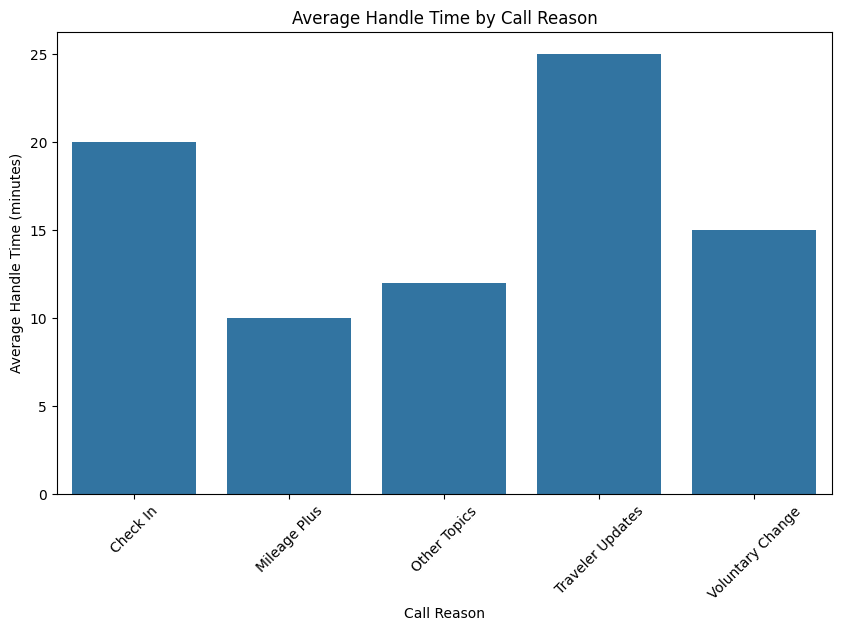

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data (adjust the file path as necessary)
df = pd.read_csv('reason.csv')

# Strip leading/trailing whitespace and standardize 'primary_call_reason'
df['primary_call_reason'] = df['primary_call_reason'].str.strip()
df['primary_call_reason'] = df['primary_call_reason'].replace({
    'Voluntary   Change': 'Voluntary Change',
    'Voluntary  Change': 'Voluntary Change',
    'Check-In': 'Check In',
    'Other  Topics': 'Other Topics',
    'Traveler   Updates': 'Traveler Updates',
    'Traveler  Updates': 'Traveler Updates',
    'Mileage   Plus': 'Mileage Plus',
    'Mileage  Plus': 'Mileage Plus',
    'Digital  Support': 'Digital Support',
    'Digital   Support': 'Digital Support',
    'Voluntary  Cancel': 'Voluntary Cancel',
    'Products & Services': 'Products and Services',

    # Add other similar corrections if needed
})

# Display the unique values after standardization (for verification)
print("Unique values after standardization:")
print(df['primary_call_reason'].unique())

# Assuming 'merged_df' contains AHT and primary_call_reason after merging with other tables
# For demonstration purposes, creating a sample 'merged_df' with AHT and standardized primary_call_reason

# Sample data (you should replace this with your actual merged dataframe that contains AHT values)
merged_df = pd.DataFrame({
    'call_id': [1, 2, 3, 4, 5],
    'primary_call_reason': ['Voluntary Change', 'Check In', 'Other Topics', 'Traveler Updates', 'Mileage Plus'],
    'AHT': [15, 20, 12, 25, 10]  # Average Handle Time in minutes
})

# Group by 'primary_call_reason' to calculate the average AHT
call_reason_stats = merged_df.groupby('primary_call_reason').agg(
    avg_AHT=('AHT', 'mean')
).reset_index()

# Plot average AHT by call reason
plt.figure(figsize=(10, 6))
sns.barplot(x='primary_call_reason', y='avg_AHT', data=call_reason_stats)
plt.title('Average Handle Time by Call Reason')
plt.xlabel('Call Reason')
plt.ylabel('Average Handle Time (minutes)')
plt.xticks(rotation=45)
plt.show()


Plot 1: Sentiment vs. AHT

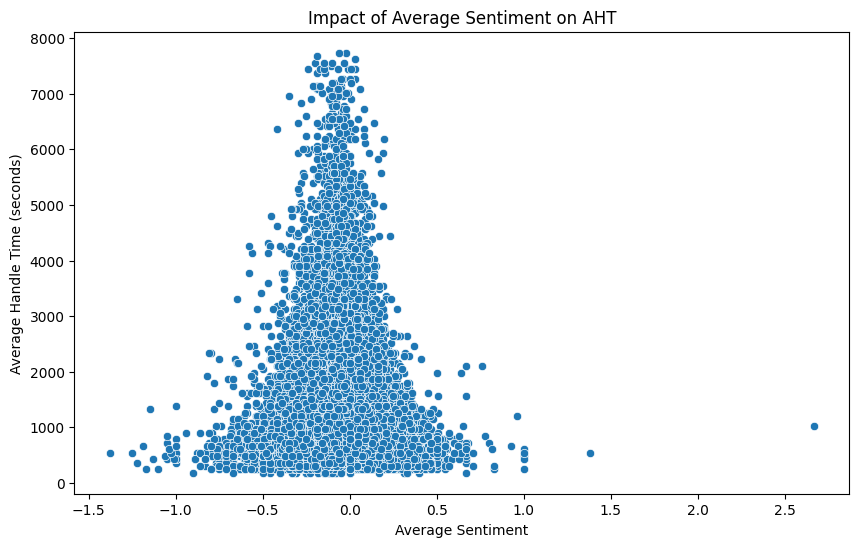

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data
calls_df = pd.read_csv('calls.csv')
customers_df = pd.read_csv('customer.csv')
sentiment_df = pd.read_csv('sentiment.csv')
reasons_df = pd.read_csv('reason.csv')

# Convert datetime columns to datetime format for analysis
calls_df['call_start_datetime'] = pd.to_datetime(calls_df['call_start_datetime'])
calls_df['agent_assigned_datetime'] = pd.to_datetime(calls_df['agent_assigned_datetime'])
calls_df['call_end_datetime'] = pd.to_datetime(calls_df['call_end_datetime'])
calls_df['AHT'] = (calls_df['call_end_datetime'] - calls_df['call_start_datetime']).dt.total_seconds()
merged_df = pd.merge(calls_df, sentiment_df, on=['call_id', 'agent_id'])
merged_df = pd.merge(merged_df, reasons_df, on='call_id')
merged_df = pd.merge(merged_df, customers_df, on='customer_id')
plt.figure(figsize=(10, 6))
sns.scatterplot(x='average_sentiment', y='AHT', data=merged_df)
plt.title('Impact of Average Sentiment on AHT')
plt.xlabel('Average Sentiment')
plt.ylabel('Average Handle Time (seconds)')
plt.show()


Plot 2: Silence Percentage vs. AHT

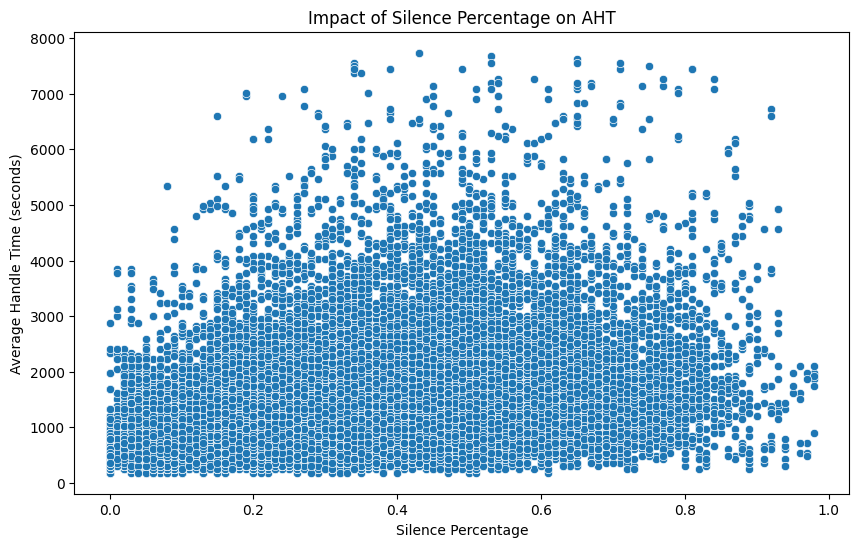

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='silence_percent_average', y='AHT', data=merged_df)
plt.title('Impact of Silence Percentage on AHT')
plt.xlabel('Silence Percentage')
plt.ylabel('Average Handle Time (seconds)')
plt.show()


Plot 3: Agent Tone vs. AHT

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


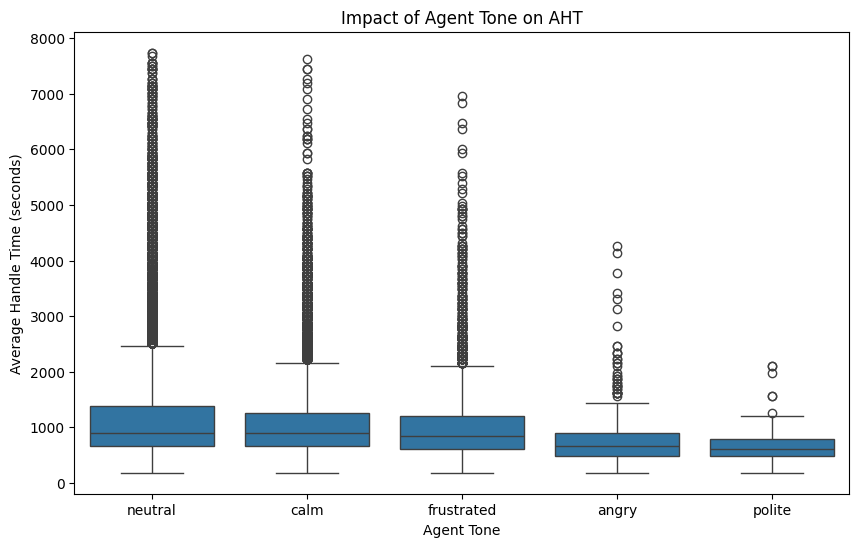

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='agent_tone', y='AHT', data=merged_df)
plt.title('Impact of Agent Tone on AHT')
plt.xlabel('Agent Tone')
plt.ylabel('Average Handle Time (seconds)')
plt.show()
